In [23]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import imageio
import os
import plotly.io as pio
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go

In [2]:
df1 = pd.read_csv('../data/hunger_index.csv')
df1

,Entity,Code,Year,Hunger_Index,Annotations
0,Afghanistan,AFG,2000,50.9,0
1,Afghanistan,AFG,2006,42.7,0
2,Afghanistan,AFG,2012,34.3,0
3,Afghanistan,AFG,2021,28.3,0
4,Albania,ALB,2000,20.7,0
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,0
467,Yemen,YEM,2012,38.4,0
468,Yemen,YEM,2021,45.1,0
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [3]:
df1.describe()

,Year,Hunger_Index
count,471.000000,471.000000
mean,2010.127389,19.824628
std,7.852951,13.449570
min,2000.000000,2.500000
25%,2006.000000,8.800000
50%,2012.000000,17.000000
75%,2021.000000,28.550000
max,2021.000000,65.100000


In [7]:
df1.dtypes

Entity           object
Code             object
Year              int64
Hunger_Index    float64
Annotations      object
dtype: object

In [19]:
df_1 = df1.rename(columns={'Entity': 'Country'})
df_1

,Country,Code,Year,Hunger_Index,Annotations
0,Afghanistan,AFG,2000,50.9,0
1,Afghanistan,AFG,2006,42.7,0
2,Afghanistan,AFG,2012,34.3,0
3,Afghanistan,AFG,2021,28.3,0
4,Albania,ALB,2000,20.7,0
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,0
467,Yemen,YEM,2012,38.4,0
468,Yemen,YEM,2021,45.1,0
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [10]:
df2 = pd.read_csv('../data/new_data.csv')
df2

,Entity,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting
0,Afghanistan,AFG,1997,44.900002,18.200001,53.200001
1,Afghanistan,AFG,2004,32.900002,8.600000,59.299999
2,Afghanistan,AFG,2013,24.600000,9.500000,40.400002
3,Afghanistan,AFG,2018,19.100000,5.100000,38.200001
4,Albania,ALB,1997,7.100000,8.100000,20.400000
...,...,...,...,...,...,...
1221,Zimbabwe,ZWE,2009,11.700000,2.400000,35.099998
1222,Zimbabwe,ZWE,2010,10.200000,3.200000,32.200001
1223,Zimbabwe,ZWE,2014,11.200000,3.200000,27.600000
1224,Zimbabwe,ZWE,2015,8.500000,3.300000,27.100000


In [15]:
df2[df2['Year'] == 2019]


,Entity,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting
16,Algeria,DZA,2019,2.700000,2.7,9.800000
23,Argentina,ARG,2019,1.700000,1.6,7.900000
62,Bangladesh,BGD,2019,22.600000,9.8,28.000000
115,Burkina Faso,BFA,2019,16.400000,8.1,23.799999
122,Burundi,BDI,2019,27.000000,4.8,54.000000
145,Central African Republic,CAF,2019,20.500000,5.2,40.200001
153,Chad,TCD,2019,29.200001,13.9,37.799999
212,Cuba,CUB,2019,2.400000,2.0,7.100000
252,East Asia and Pacific,0,2019,5.370944,NaN,NaN
260,Ecuador,ECU,2019,5.200000,3.7,23.000000


In [31]:
df_2 = df2.rename(columns = {'Entity' : 'Country'})
df_2

,Country,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting
0,Afghanistan,AFG,1997,44.900002,18.200001,53.200001
1,Afghanistan,AFG,2004,32.900002,8.600000,59.299999
2,Afghanistan,AFG,2013,24.600000,9.500000,40.400002
3,Afghanistan,AFG,2018,19.100000,5.100000,38.200001
4,Albania,ALB,1997,7.100000,8.100000,20.400000
...,...,...,...,...,...,...
1221,Zimbabwe,ZWE,2009,11.700000,2.400000,35.099998
1222,Zimbabwe,ZWE,2010,10.200000,3.200000,32.200001
1223,Zimbabwe,ZWE,2014,11.200000,3.200000,27.600000
1224,Zimbabwe,ZWE,2015,8.500000,3.300000,27.100000


In [20]:
df_2021 = df_1[df_1['Year'] == 2021]
top_10_countries_2021 = df_2021.nlargest(10, 'Hunger_Index')

fig = px.bar(top_10_countries_2021, x='Country', y='Hunger_Index', 
             title='Top 10 Countries with the Highest Hunger Index in 2021')

fig.show()

/var/folders/z3/h787plg151ngb1cq61f4rbf40000gn/T/ipykernel_23750/858966731.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



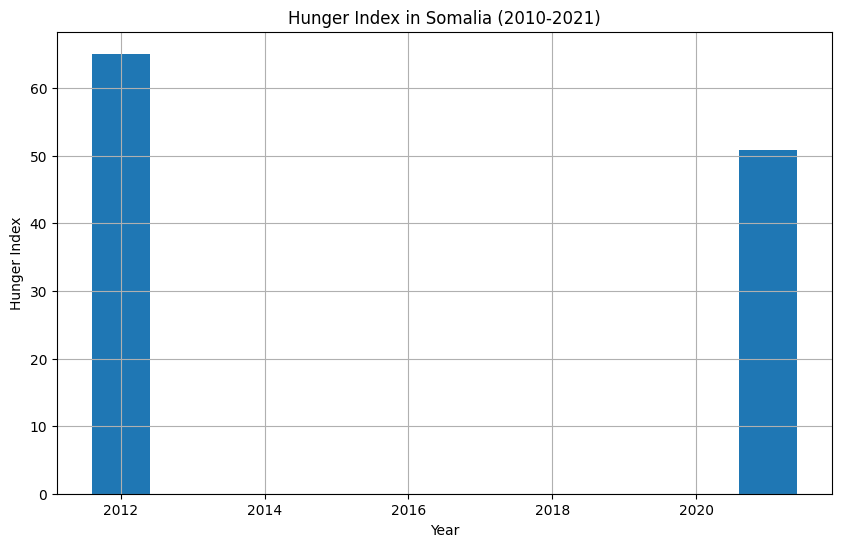

In [29]:

df_somalia = df_1[(df_1['Country'] == 'Somalia') & df_1['Year'].between(2010, 2022)]


df_somalia.sort_values('Year', inplace=True)


years = df_somalia['Year']
hunger_index = df_somalia['Hunger_Index']

plt.figure(figsize=(10, 6))
plt.bar(years, hunger_index)
plt.title('Hunger Index in Somalia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Hunger Index')
plt.grid(True)


plt.show()

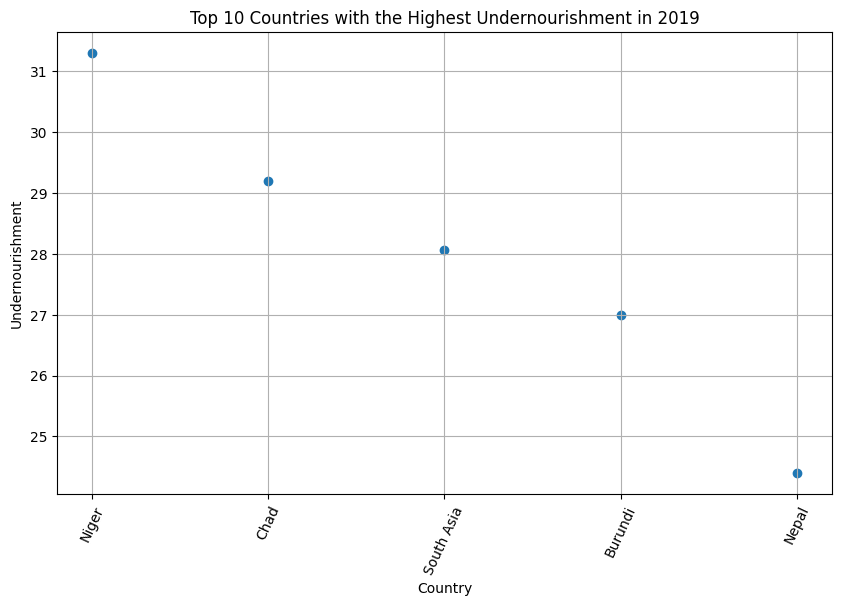

In [36]:
df_2019 = df_2[df_2['Year'] == 2019]
df_top_10 = df_2019.nlargest(5, '%_Child_Undernourishment')


countries = df_top_10['Country']
undernourishment = df_top_10['%_Child_Undernourishment']


plt.figure(figsize=(10, 6))
plt.scatter(countries, undernourishment)
plt.title('Top 10 Countries with the Highest Undernourishment in 2019')
plt.xlabel('Country')
plt.ylabel('Undernourishment')

plt.xticks(rotation=65)  
plt.grid(True)


plt.show()

In [39]:
df_filtered = df_2[df_2['Country'] == 'South Asia']
df_filtered

,Country,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting
951,South Asia,0,2000,42.873184,NaN,NaN
952,South Asia,0,2001,42.032192,NaN,NaN
953,South Asia,0,2002,41.195801,NaN,NaN
954,South Asia,0,2003,40.364460,NaN,NaN
955,South Asia,0,2004,39.538620,NaN,NaN
956,South Asia,0,2005,38.718704,NaN,NaN
957,South Asia,0,2006,37.905132,NaN,NaN
958,South Asia,0,2007,37.098305,NaN,NaN
959,South Asia,0,2008,36.298615,NaN,NaN
960,South Asia,0,2009,35.506432,NaN,NaN


In [48]:
df_2 = df_2[df_2['Country'] != 'Low income']


In [49]:
df_2 = df_2[df_2['Country'] != 'Lower middle income']

In [50]:
df_2 = df_2[df_2['Country'] != 'South Asia']


In [51]:
df_2

,Country,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting
0,Afghanistan,AFG,1997,44.900002,18.200001,53.200001
1,Afghanistan,AFG,2004,32.900002,8.600000,59.299999
2,Afghanistan,AFG,2013,24.600000,9.500000,40.400002
3,Afghanistan,AFG,2018,19.100000,5.100000,38.200001
4,Albania,ALB,1997,7.100000,8.100000,20.400000
...,...,...,...,...,...,...
1221,Zimbabwe,ZWE,2009,11.700000,2.400000,35.099998
1222,Zimbabwe,ZWE,2010,10.200000,3.200000,32.200001
1223,Zimbabwe,ZWE,2014,11.200000,3.200000,27.600000
1224,Zimbabwe,ZWE,2015,8.500000,3.300000,27.100000


In [59]:
df_2.dtypes


Country                      object
Code                         object
Year                          int64
%_Child_Undernourishment    float64
%_Child_Wasting             float64
%_Child_Stunting            float64
dtype: object

In [52]:
df_2[df_2['Country'] == 'South Asia']

,Country,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting


In [53]:
df_2[df_2['Country'] == 'Lower middle income']

,Country,Code,Year,%_Child_Undernourishment,%_Child_Wasting,%_Child_Stunting


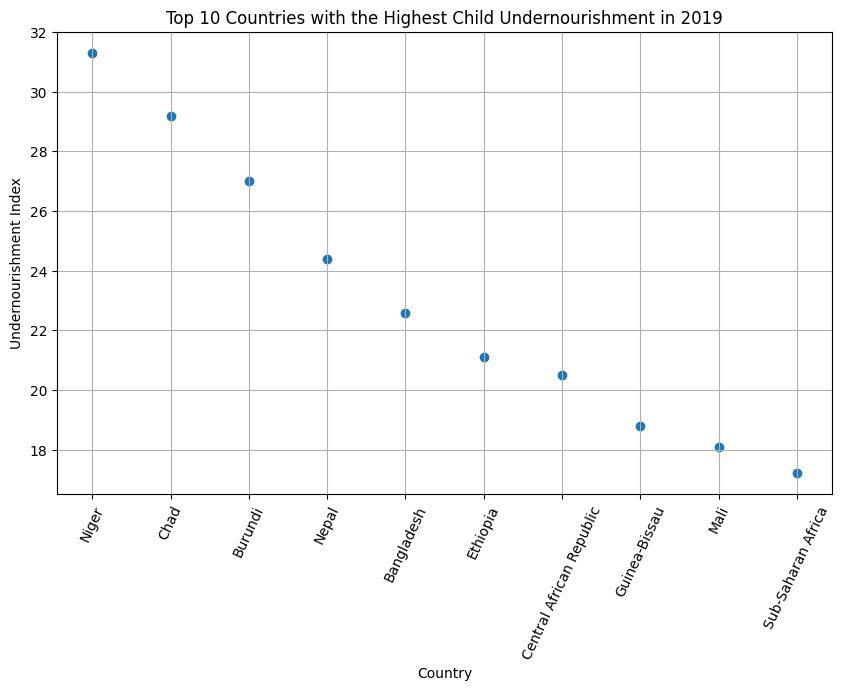

In [57]:
df_2019 = df_2[df_2['Year'] == 2019]
df_top_10 = df_2019.nlargest(10, '%_Child_Undernourishment')


countries = df_top_10['Country']
undernourishment = df_top_10['%_Child_Undernourishment']


plt.figure(figsize=(10, 6))
plt.scatter(countries, undernourishment)
plt.title('Top 10 Countries with the Highest Child Undernourishment in 2019')
plt.xlabel('Country')
plt.ylabel('Undernourishment Index')

plt.xticks(rotation=65)  
plt.grid(True)


plt.show()

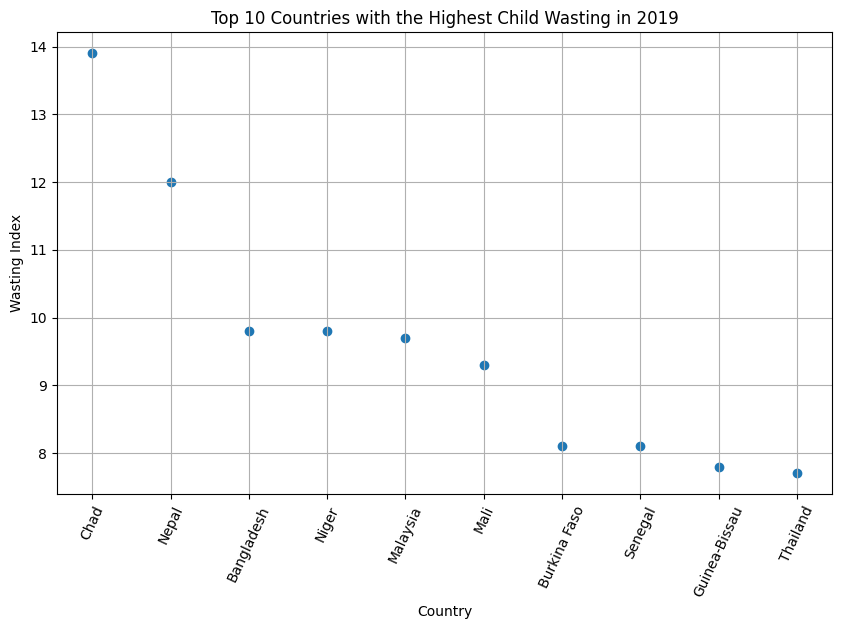

In [56]:
df_2019 = df_2[df_2['Year'] == 2019]
df_top_10 = df_2019.nlargest(10, '%_Child_Wasting')


countries = df_top_10['Country']
undernourishment = df_top_10['%_Child_Wasting']


plt.figure(figsize=(10, 6))
plt.scatter(countries, undernourishment)
plt.title('Top 10 Countries with the Highest Child Wasting in 2019')
plt.xlabel('Country')
plt.ylabel('Wasting Index')

plt.xticks(rotation=65)  
plt.grid(True)

plt.show()

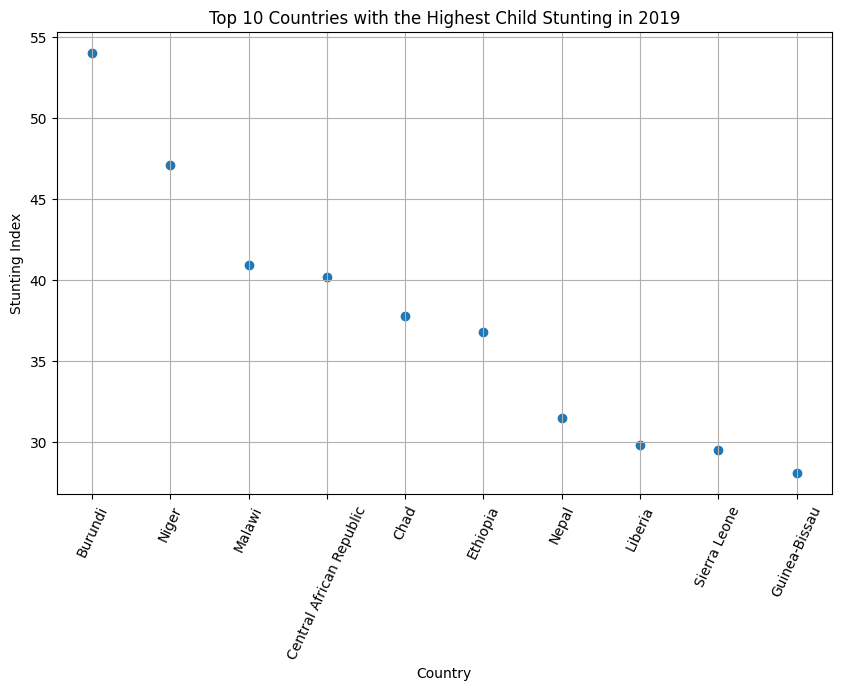

In [58]:
df_2019 = df_2[df_2['Year'] == 2019]
df_top_10 = df_2019.nlargest(10, '%_Child_Stunting')


countries = df_top_10['Country']
undernourishment = df_top_10['%_Child_Stunting']


plt.figure(figsize=(10, 6))
plt.scatter(countries, undernourishment)
plt.title('Top 10 Countries with the Highest Child Stunting in 2019')
plt.xlabel('Country')
plt.ylabel('Stunting Index')

plt.xticks(rotation=65)  
plt.grid(True)

plt.show()

In [73]:

countries = ['Chad', 'Nigeria', 'Burundi', 'Nepal']
df_filtered = df_2[(df_2['Country'].isin(countries)) & (df_2['Year'] == 2019)]

fig = px.bar(df_filtered, x='Country', y=['%_Child_Undernourishment', '%_Child_Wasting', '%_Child_Stunting'],
             barmode='group', title='Index of Undernourishment, Wasting, and Stunting in 2019',
             labels={'value': 'Index (%)', 'variable': 'Category', 'Country': 'Country'})

fig.update_layout(height=600, width=1000)

fig.show()

In [75]:
df_2021 = df_1[df_1['Year'] == 2021]
df_lowest_index = df_2021.nsmallest(10, 'Hunger_Index')

fig = px.bar(df_lowest_index, x='Country', y = 'Hunger_Index', 
             title = 'Countries with the Lowest Hunger Index in the World')

fig.show()